In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [3]:
# Load data
df = pd.read_csv("../data/SPX.csv")
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date")
Price = df.loc[:,"Adj Close"]

In [8]:
def divide_period(window_length = 63, series = Price):
    """
    return the vector that divides the series into windows of fixed size
    """

    # define number of windows
    num_windows = len(series) // window_length

    # divide the Price into num_windows
    window_index = np.arange(0,(1+num_windows)*window_length,window_length)
    return window_index

In [9]:
# find the date
window_index = divide_period().astype(int)
price_index = Price.index[window_index[1:]]

In [84]:
Price.pct_change().abs().mean()

0.006500679942123787

In [122]:
"""
np.random.seed(1723)
n_days = 100
window = 5
mo = simulate_momentum_data(n_days,0.05,0.1)
mo = pd.Series(mo)
#pct_change = lambda x: pd.Series(x.diff()/x.shift())
"""
def compute_penalty_mag(r):
    return sum([0 if np.allclose(x,0) else abs(y) for x,y in zip(np.diff(np.sign(r)),r)])/sum(abs(r))

def compute_penalty_sign(r):
    return sum([0 if np.allclose(x,0) else 1 for x,y in zip(np.diff(np.sign(r)),r)])/len(r)

def compute_penalty(data):
    """
    data: series
    """

    r = data.pct_change()[1:]
    r_ = data[::-1].pct_change()[1:]
    penalty_mag =  min(compute_penalty_mag(r), compute_penalty_mag(r_))
    penalty_sign =  (compute_penalty_sign(r) + compute_penalty_sign(r_))/2
    return 0.3*penalty_sign+penalty_mag

In [ ]:
def compute_penalty(data):
    """
    data: series
    """

    r = data.pct_change()[1:]
    penalty_mag =  min(compute_penalty_mag(r), compute_penalty_mag(r_))
    return 0.3*penalty_sign+penalty_mag

In [123]:
def compute_jc_measure1(data,window = 5):
    r = data.pct_change()
    f2 = np.sign(r).rolling(window=window).mean().abs().mean()
    f3 = np.sign(r).abs().rolling(window=window).mean().mean()
    ratio_sign = f2/f3
    return ratio_sign
    
def compute_jc_measure2(data,window = 5):
    r = data.pct_change()
    f2 = r.rolling(window=window).mean().abs().mean()
    f3 = r.abs().rolling(window=window).mean().mean()
    ratio_mag = f2/f3
    return ratio_mag

def compute_jc_mm(data):
    r = data.pct_change()
    f1 = (r.sum())**2
    f2 = (r**2).sum()
    return f2/f1

In [124]:
window_index = divide_period(window_length = 20)
price_index = Price.index[window_index]

In [125]:
penalty_score = []
for i in range(len(window_index)-1):
    window_price = Price[window_index[i]:window_index[i+1]]
    score = compute_penalty(window_price)
    penalty_score.append(score)

In [126]:
cut_off = np.median(penalty_score)
hi = np.percentile(penalty_score, 55)
lo = np.percentile(penalty_score, 45)

In [127]:
lo

0.48667838587833462

In [128]:
hi

0.52702351445017015

In [129]:
# 1: momentum
# -1: mean reversion
label1 = np.where(penalty_score<lo, 1, 0)
label_1 = np.where(penalty_score>hi, -1, 0)
label = label1 + label_1

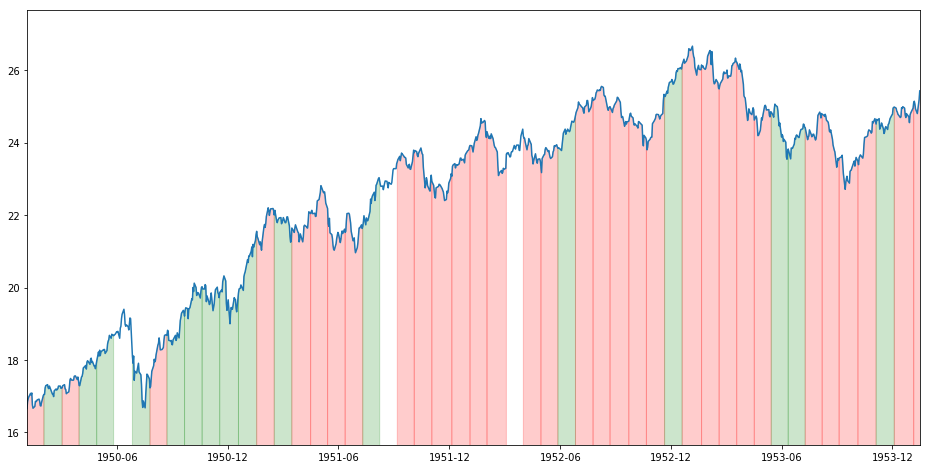

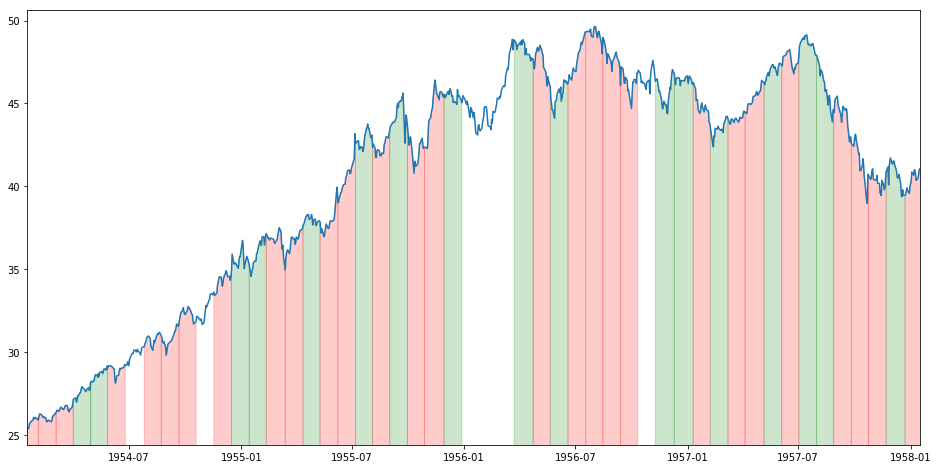

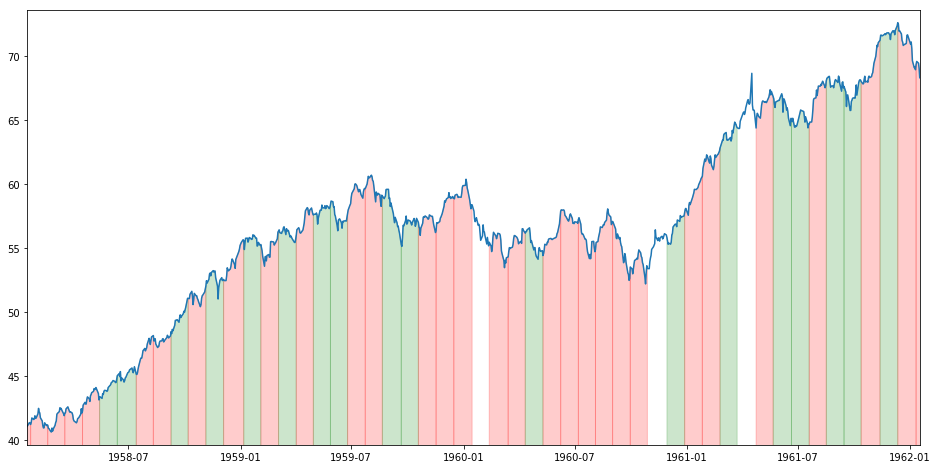

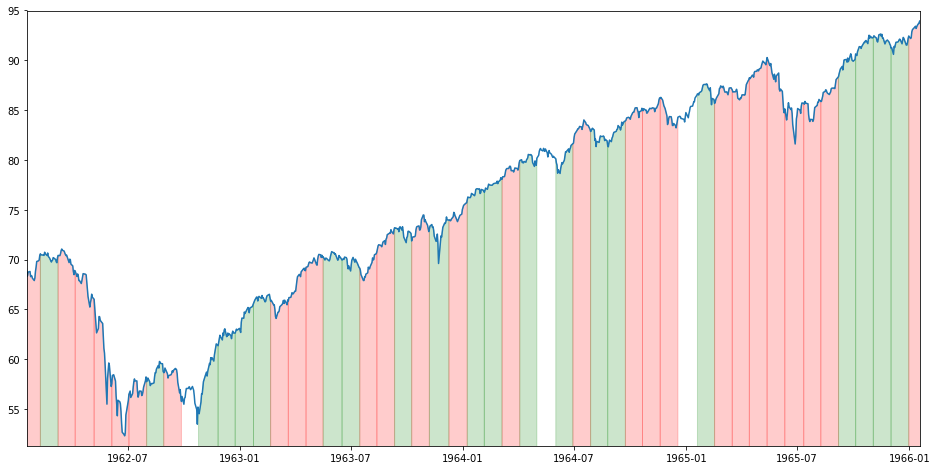

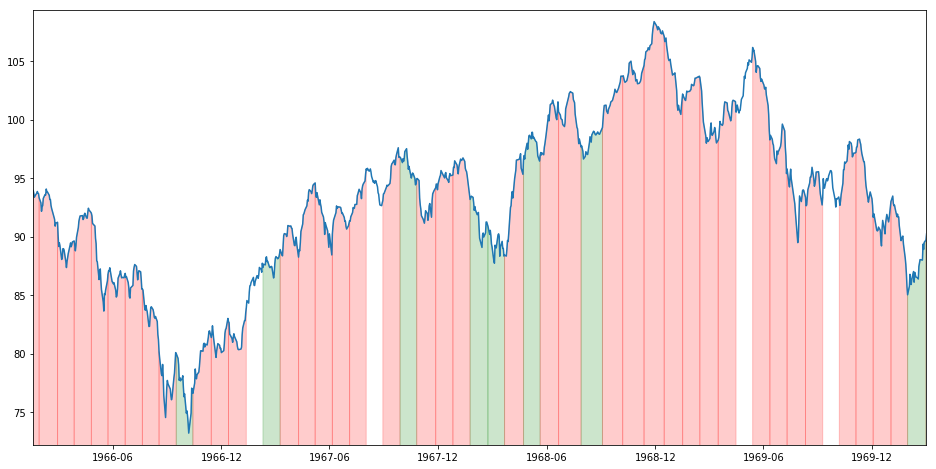

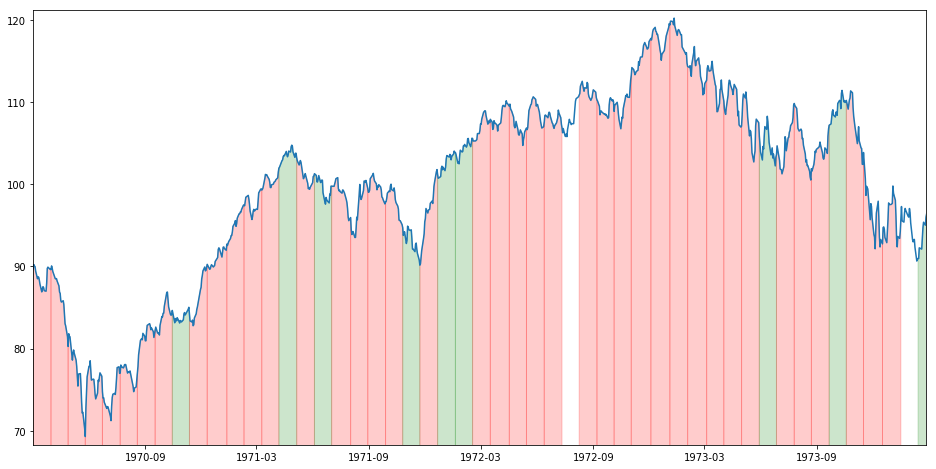

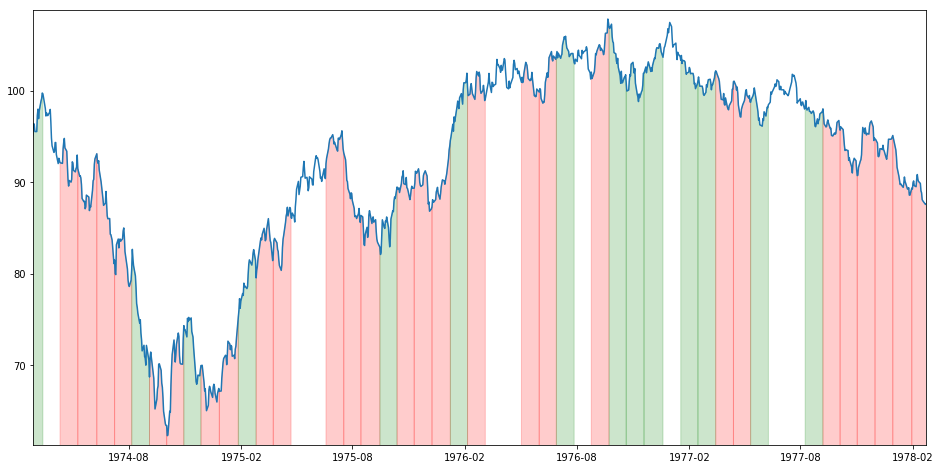

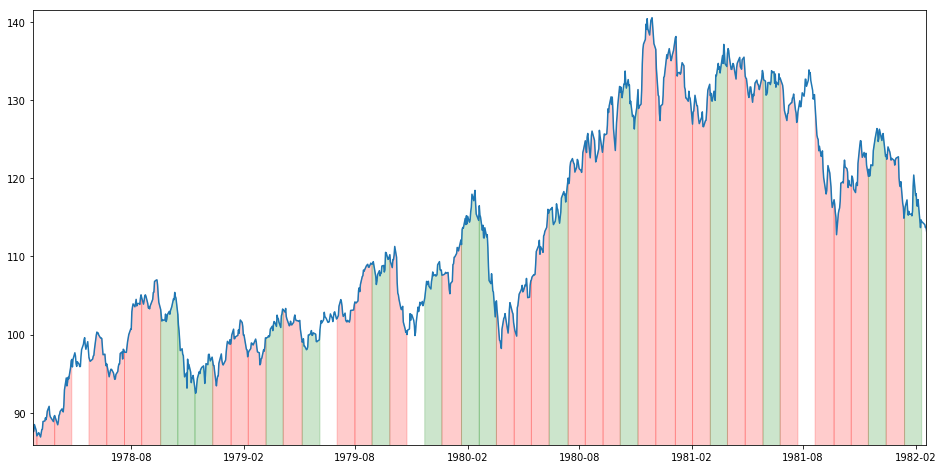

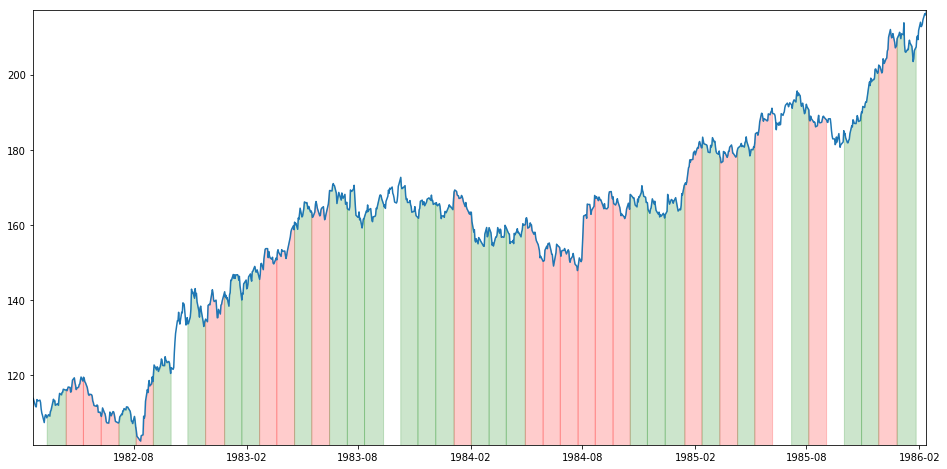

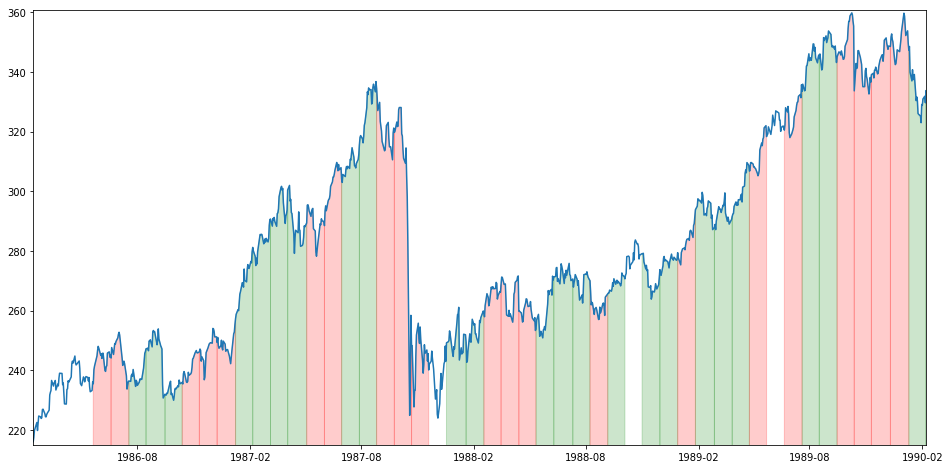

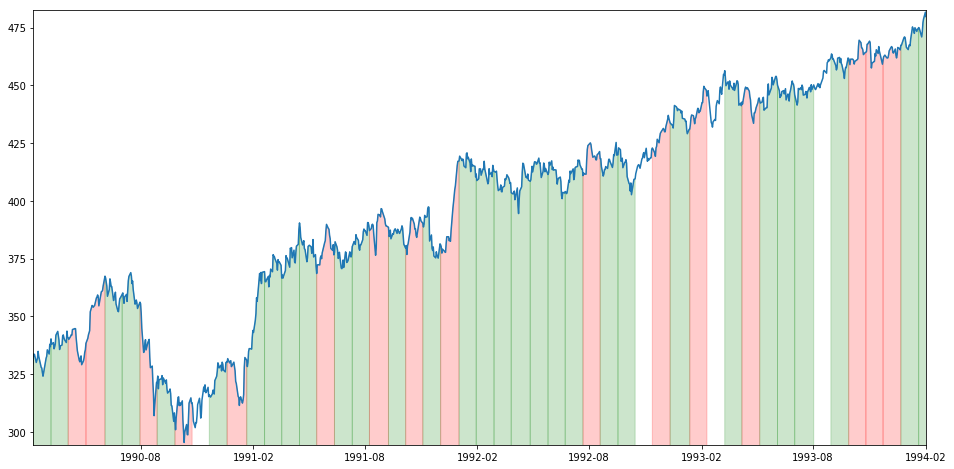

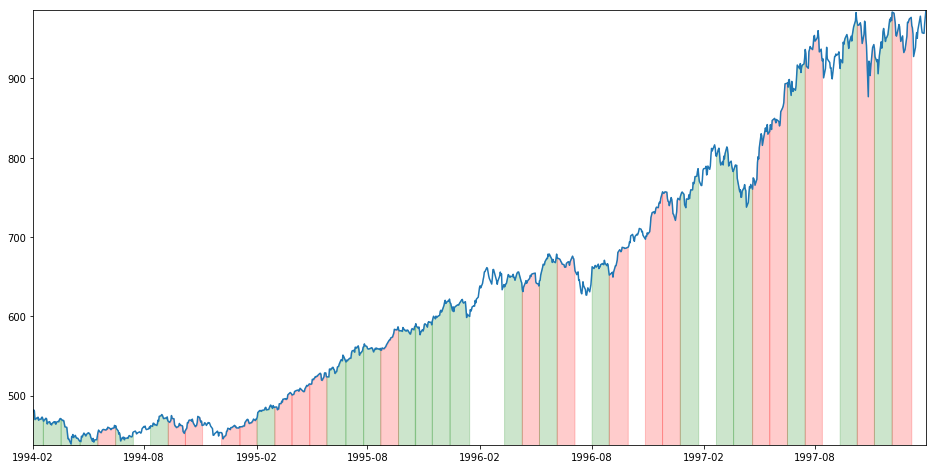

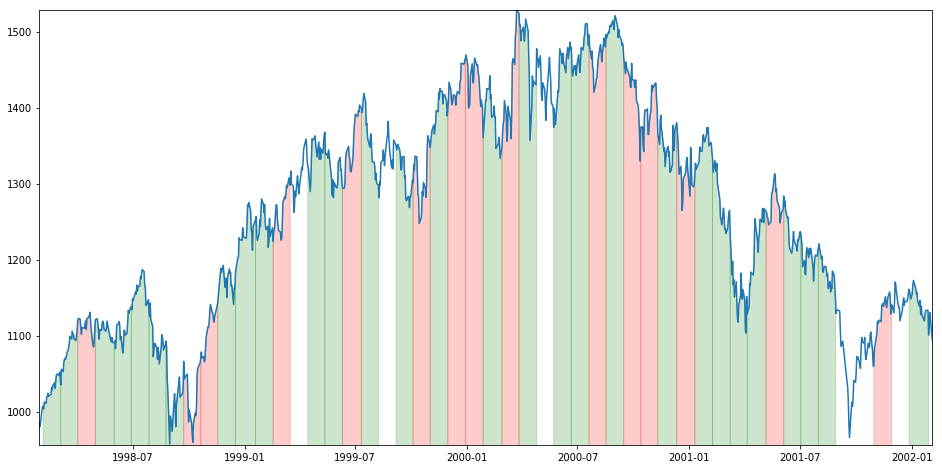

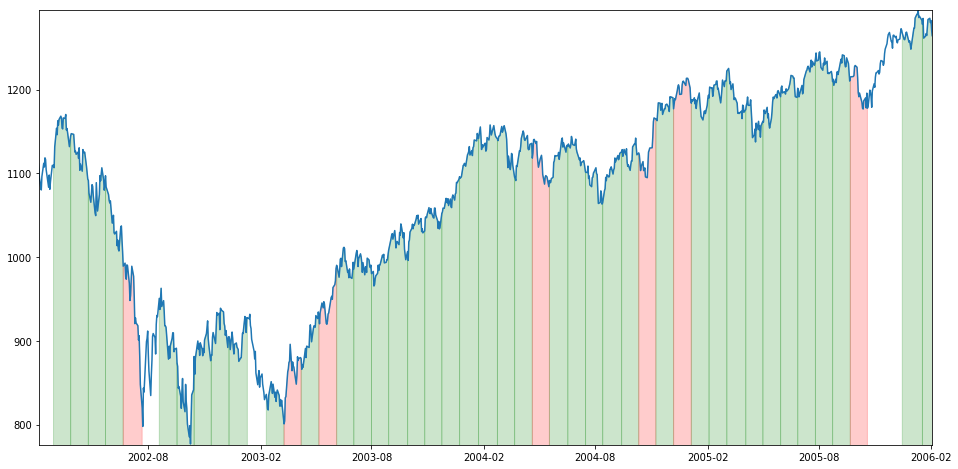

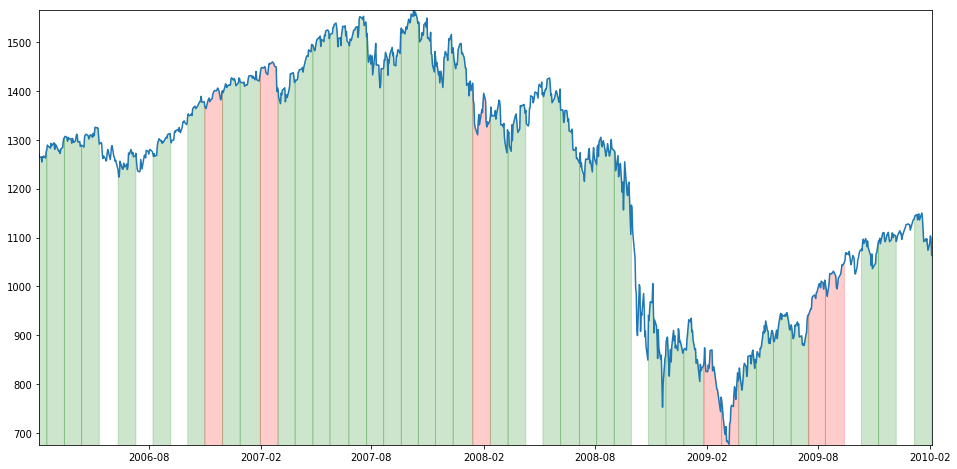

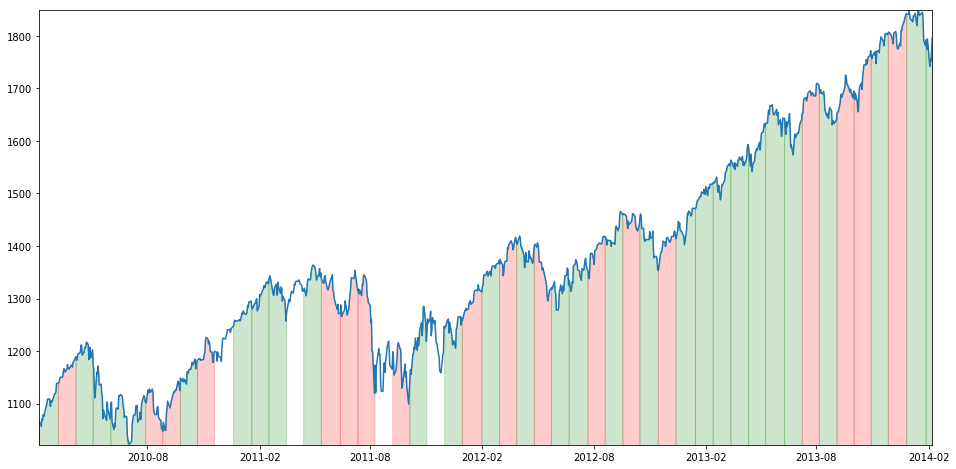

In [130]:
l = len(Price)//17
for k in range(16):
    fig = plt.figure(figsize=(16,8))
    for i in range(len(price_index)-1):
        start = price_index[i]
        end = price_index[i+1]
        x = Price.index[(Price.index>=start) &(Price.index<=end) ]
        y1 = Price.loc[x]
        y2 = 0
        if label[i]==1:
            plt.fill_between(x,y2,y1,alpha=0.2,color="r")
        elif label[i]==-1:
            plt.fill_between(x,y2,y1,alpha=0.2,color="g")
        xmin = Price.index[k*l]
        xmax=Price.index[(k+1)*l]
        plt.axis(xmin = xmin,xmax=xmax,ymin = Price.loc[xmin:xmax].min()-1., ymax = Price.loc[xmin:xmax].max()+1.)
    plt.plot(Price)

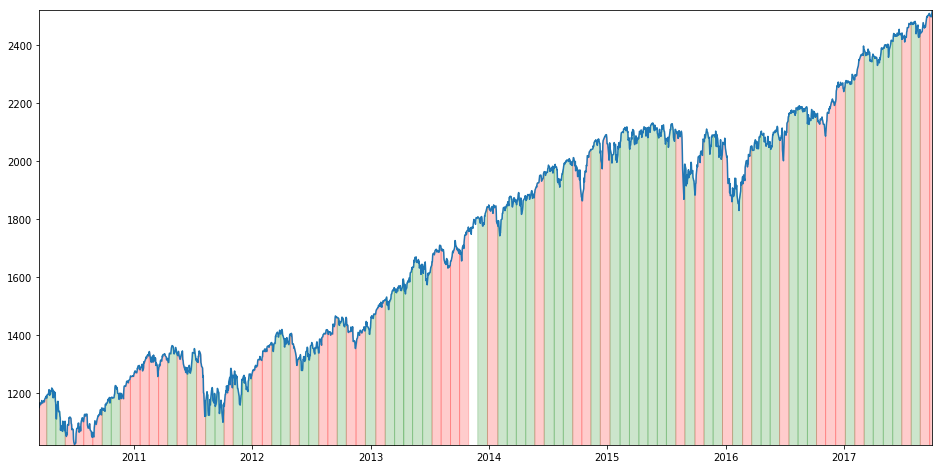

In [33]:
fig = plt.figure(figsize=(16,8))
for i in range(len(price_index)-1):
    start = price_index[i]
    end = price_index[i+1]
    x = Price.index[(Price.index>=start) &(Price.index<=end) ]
    y1 = Price.loc[x]
    y2 = 0
    if label[i]==1:
        plt.fill_between(x,y2,y1,alpha=0.2,color="r")
    elif label[i]==-1:
        plt.fill_between(x,y2,y1,alpha=0.2,color="g")
    xmin = Price.index[-2000]
    xmax=Price.index[-100]
    plt.axis(xmin = xmin,xmax=xmax,ymin = Price.loc[xmin:xmax].min()-1., ymax = Price.loc[xmin:xmax].max()+1.)
plt.plot(Price)

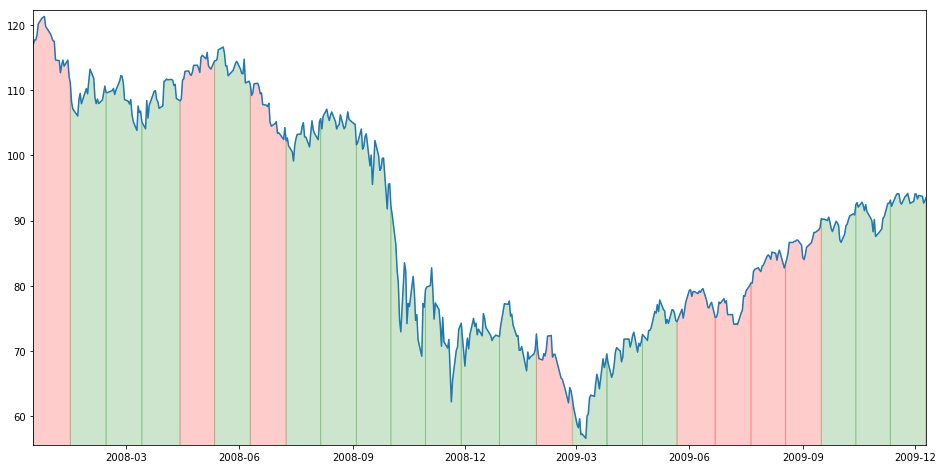

In [56]:
fig = plt.figure(figsize=(16,8))
for i in range(len(price_index)-1):
    start = price_index[i]
    end = price_index[i+1]
    x = Price.index[(Price.index>=start) &(Price.index<=end) ]
    y1 = Price.loc[x]
    y2 = 0
    if label[i]==1:
        plt.fill_between(x,y2,y1,alpha=0.2,color="r")
    elif label[i]==-1:
        plt.fill_between(x,y2,y1,alpha=0.2,color="g")
    xmin = Price.index[2000]
    xmax=Price.index[2500]
    plt.axis(xmin = xmin,xmax=xmax,ymin = Price.loc[xmin:xmax].min()-1., ymax = Price.loc[xmin:xmax].max()+1.)
plt.plot(Price)